In [1]:
'''
Problem definitions:
One day ahead prediction: Rolling Linear Regression, ARIMA, Neural Networks, LSTM
Momentum/Mean-Reversion Strategies
Security clustering, portfolio construction/hedging
Which company has biggest chance of being bankrupt? Which one is undervalued (how prices behaved afterwards), what is Return on Investment?

'''

'\nProblem definitions:\nOne day ahead prediction: Rolling Linear Regression, ARIMA, Neural Networks, LSTM\nMomentum/Mean-Reversion Strategies\nSecurity clustering, portfolio construction/hedging\nWhich company has biggest chance of being bankrupt? Which one is undervalued (how prices behaved afterwards), what is Return on Investment?\n\n'

## 1) applying statistical concepts to dataset

In [195]:
# read data
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as pyplot
from pandas.plotting import autocorrelation_plot

price = pd.read_csv('prices-split-adjusted.csv')
price = price.set_index('symbol')

In [169]:
# prediction in-sample prices using linear regression method 1 : statsmodels library

df = price.loc[['CI']]
df = df.set_index(keys='date',drop = True)
X = df.drop('close',axis = 'columns')
y = df[['close']]
X = sm.add_constant(X)


def linear_regression_insample_statsmodels(X,y):
  

    model = sm.OLS(y,X).fit()
    predictions = model.predict(X)

    print_model = model.summary()
    print(print_model)
    
    return predictions, model.summary()

C:\Users\Harin\.conda\envs\kaggle_nyse_dataset_analysis\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [95]:
# forecasting using linear regression 

def Linear_reg_outofsample_statsmodels(X,y):

    
    X.index = pd.to_datetime(X.index)
    y.index = pd.to_datetime(y.index)
    tscv = TimeSeriesSplit(n_splits = 2)


    for train_index, test_index in tscv.split(X.values):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_test.merge(pd.DataFrame(model.predict(X_test),index = X_test.index), on = 'date')
    
        
    return model.predict(X_test), model.summary()

In [110]:
# prediction in-sample prices using rolling linear regression method 2 : statsmodel 
def rolling_linear_regression(X,y):
    
    model = sm.OLS(y, X, window_type='rolling', window=100).fit()
    
    return model.predict model.summary()

In [176]:
# prediction out of sample prices using linear regression method 2 : sci-kit library

def sklearn_outofsample_sklearn(X,y):

    
    forecast_size = 10
    test_size = 0.2
    #X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size)
    y = df[['close']]
    y = y.shift(-forecast_size)
    
    X = preprocessing.scale(X) #processing the feature array
    X_ = X[-forecast_size:]
    X = X[:-forecast_size]
    y = y.dropna()
    X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=test_size) #cross validation 

    
    
    learner = linear_model.LinearRegression(); #initializing linear regression model

    learner.fit(X_train,y_train); #training the linear regression model
    score=learner.score(X_test,y_test);#testing the linear regression model

    forecast= learner.predict(X_); #set that will contain the forecasted data



In [ ]:
# summary statistic to compare different results

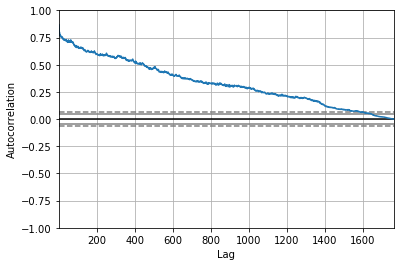

In [189]:
autocorrelation_plot(df) #result shows positive correlation for lags in 100s

C:\Users\Harin\.conda\envs\kaggle_nyse_dataset_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Harin\.conda\envs\kaggle_nyse_dataset_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1751
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3118.062
Method:                       css-mle   S.D. of innovations              1.436
Date:                Thu, 03 Oct 2019   AIC                           6250.124
Time:                        10:39:38   BIC                           6288.400
Sample:                             1   HQIC                          6264.273
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0548      0.031      1.749      0.080      -0.007       0.116
ar.L1.D.close    -0.0145      0.024     -0.609      0.543      -0.061       0.032
ar.L2.D.close    -0.0258      0.024     

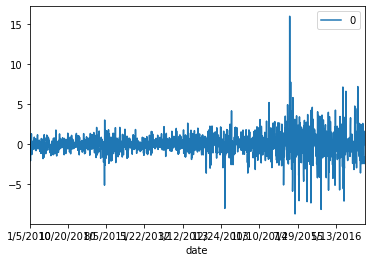

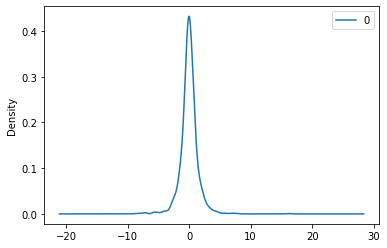

                 0
count  1751.000000
mean     -0.000098
std       1.436311
min      -8.707427
25%      -0.572873
50%      -0.011616
75%       0.595553
max      16.004610


In [201]:
#ARIMA
#GARCH

model = ARIMA(y, order=(5,1,0))
#model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
#pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
%matplotlib inline


# issues with the model - 5,1,0 is arbitrary. it might not work for all stocks. should find if there's a way to automate it. 
# I shd first start with determining values of p, d and q. 

In [175]:
score

0.9886226479904363